In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import pyclustertend
import random
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture


from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [28]:
cd DATA

C:\Users\diego\Desktop\DATA


In [30]:
DBM2010 = pd.read_spss("2010.sav")
DBM2011 = pd.read_spss("2011.sav")
DBM2012 = pd.read_spss("2012.sav")
DBM2013 = pd.read_spss("2013.sav")
DBM2014 = pd.read_spss("2014.sav")
DBM2015 = pd.read_spss("2015.sav")
DBM2016 = pd.read_spss("2016.sav")
DBM2017 = pd.read_spss("2017.sav")
DBM2018 = pd.read_spss("2018.sav")
DBM2019 = pd.read_spss("2019.sav")

In [31]:
DBM2019.columns.to_list(), len(DBM2019.columns.to_list())

(['DEPREG',
  'MUPREG',
  'MESREG',
  'AÑOREG',
  'AÑOOCU',
  'CLAUNI',
  'NUNUHO',
  'NUNUMU',
  'EDADHOM',
  'EDADMUJ',
  'PUEHOM',
  'PUEMUJ',
  'NACHOM',
  'NACMUJ',
  'ESCHOM',
  'ESCMUJ',
  'CIUOHOM',
  'CIUOMUJ',
  'DEPOCU',
  'MUPOCU',
  'DIAOCU',
  'MESOCU'],
 22)

In [32]:
#ARREGLAMOS LAS COLUMNAS AÑOOCU , 
DBM2010.rename(columns={'Añoocu':'AÑOOCU'}, inplace=True)
DBM2011.rename(columns={'Añoocu':'AÑOOCU'}, inplace=True)
DBM2012[['AÑOOCU']] = 2012.0
DBM2013[['AÑOOCU']] = 2013.0
DBM2014[['AÑOOCU']] = 2014.0

In [33]:
#ARREGLAMOS LAS COLUMNAS GETMUJ Y PUEMUJ

DBM2013[['GETMUJ']] = 'No indigena'
DBM2013.loc[DBM2013['PUEMUJ'] == 'Maya', 'GETMUJ'] = 'Indigena'
DBM2013.loc[DBM2013['PUEMUJ'] == 'Ignorado', 'GETMUJ'] = 'Ignorado'


DBM2014[['GETMUJ']] = 'No indigena'
DBM2014.loc[DBM2014['PUEMUJ'] == 'Maya', 'GETMUJ'] = 'Indigena'
DBM2014.loc[DBM2014['PUEMUJ'] == 'Ignorado', 'GETMUJ'] = 'Ignorado'


DBM2015[['GETMUJ']] = 'No indigena'
DBM2015.loc[DBM2015['PUEMUJ'] == 'Maya', 'GETMUJ'] = 'Indigena'
DBM2015.loc[DBM2015['PUEMUJ'] == 'Ignorado', 'GETMUJ'] = 'Ignorado'


DBM2016[['GETMUJ']] = 'No indigena'
DBM2016.loc[DBM2016['PUEMUJ'] == 'Maya', 'GETMUJ'] = 'Indigena'
DBM2016.loc[DBM2016['PUEMUJ'] == 'Ignorado', 'GETMUJ'] = 'Ignorado'


DBM2017[['GETMUJ']] = 'No indigena'
DBM2017.loc[DBM2017['PUEMUJ'] == 'Maya', 'GETMUJ'] = 'Indigena'
DBM2017.loc[DBM2017['PUEMUJ'] == 'Ignorado', 'GETMUJ'] = 'Ignorado'


DBM2018[['GETMUJ']] = 'No indigena'
DBM2018.loc[DBM2018['PUEMUJ'] == 'Maya', 'GETMUJ'] = 'Indigena'
DBM2018.loc[DBM2018['PUEMUJ'] == 'Ignorado', 'GETMUJ'] = 'Ignorado'


DBM2019[['GETMUJ']] = 'No indigena'
DBM2019.loc[DBM2019['PUEMUJ'] == 'Maya', 'GETMUJ'] = 'Indigena'
DBM2019.loc[DBM2019['PUEMUJ'] == 'Ignorado', 'GETMUJ'] = 'Ignorado'


In [34]:
#ARREGLAMOOS LAS COLUMNAS GETHOM AND PUEHOM

DBM2013[['GETHOM']] = 'No indigena'
DBM2013.loc[DBM2013['PUEHOM'] == 'Maya', 'GETHOM'] = 'Indigena'
DBM2013.loc[DBM2013['PUEHOM'] == 'Ignorado', 'GETHOM'] = 'Ignorado'


DBM2014[['GETHOM']] = 'No indigena'
DBM2014.loc[DBM2014['PUEHOM'] == 'Maya', 'GETHOM'] = 'Indigena'
DBM2014.loc[DBM2014['PUEHOM'] == 'Ignorado', 'GETHOM'] = 'Ignorado'


DBM2015[['GETHOM']] = 'No indigena'
DBM2015.loc[DBM2015['PUEHOM'] == 'Maya', 'GETHOM'] = 'Indigena'
DBM2015.loc[DBM2015['PUEHOM'] == 'Ignorado', 'GETHOM'] = 'Ignorado'


DBM2016[['GETHOM']] = 'No indigena'
DBM2016.loc[DBM2016['PUEHOM'] == 'Maya', 'GETHOM'] = 'Indigena'
DBM2016.loc[DBM2016['PUEHOM'] == 'Ignorado', 'GETHOM'] = 'Ignorado'


DBM2017[['GETHOM']] = 'No indigena'
DBM2017.loc[DBM2017['PUEHOM'] == 'Maya', 'GETHOM'] = 'Indigena'
DBM2017.loc[DBM2017['PUEHOM'] == 'Ignorado', 'GETHOM'] = 'Ignorado'


DBM2018[['GETHOM']] = 'No indigena'
DBM2018.loc[DBM2018['PUEHOM'] == 'Maya', 'GETHOM'] = 'Indigena'
DBM2018.loc[DBM2018['PUEHOM'] == 'Ignorado', 'GETHOM'] = 'Ignorado'


DBM2019[['GETHOM']] = 'No indigena'
DBM2019.loc[DBM2019['PUEHOM'] == 'Maya', 'GETHOM'] = 'Indigena'
DBM2019.loc[DBM2019['PUEHOM'] == 'Ignorado', 'GETHOM'] = 'Ignorado'


In [35]:
#Arreglamos las columnas 2010,2011,2012 , todaAS LAS COLUMNAS EN MAYUSCULAS y EL MISMO NOMBRE DE COLUMNAS.
DBM2010.rename(columns={'Depreg': 'DEPREG', 'mupreg': 'MUPREG', 'Mesreg':'MESREG', 'Añoreg':'AÑOREG', 'Clauni':'CLAUNI', 'Edadhom': 'EDADHOM', 'Edadmuj': 'EDADMUJ', 'Nachom':'NACHOM', 'Nacmuj':'NACMUJ', 'Eschom':'ESCHOM', 'Escmuj': 'ESCMUJ', 'Ocuhom':'CIUOHOM', 'Ocumuj':'CIUOMUJ', 'Depocu': 'DEPOCU', 'mupocu':'MUPOCU', 'Diaocu':'DIAOCU', 'Mesocu':'MESOCU', 'Gethom':'GETHOM', 'Getmuj':'GETMUJ'}, inplace=True)
DBM2011.rename(columns={'Depreg': 'DEPREG', 'mupreg': 'MUPREG', 'Mesreg':'MESREG', 'Añoreg':'AÑOREG', 'Clauni':'CLAUNI', 'Edadhom': 'EDADHOM', 'Edadmuj': 'EDADMUJ', 'Nachom':'NACHOM', 'Nacmuj':'NACMUJ', 'Eschom':'ESCHOM', 'Escmuj': 'ESCMUJ', 'Ocuhom':'CIUOHOM', 'Ocumuj':'CIUOMUJ', 'Depocu': 'DEPOCU', 'mupocu':'MUPOCU', 'Diaocu':'DIAOCU', 'Mesocu':'MESOCU', 'Gethom':'GETHOM', 'Getmuj':'GETMUJ'}, inplace=True)
DBM2012.rename(columns={'OCUHOM':'CIUOHOM', 'OCUMUJ': 'CIUOMUJ'}, inplace=True)


In [36]:
COL_CONSENSUS = ['DEPREG', 'MUPREG', 'MESREG', 'AÑOREG', 'CLAUNI', 'EDADHOM', 'EDADMUJ', 'NACHOM', 'NACMUJ', 'ESCHOM', 'ESCMUJ', 'CIUOHOM', 'CIUOMUJ', 'DEPOCU', 'MUPOCU', 'DIAOCU', 'MESOCU', 'AÑOOCU', 'GETHOM', 'GETMUJ']

frames_list = [DBM2010[COL_CONSENSUS], DBM2011[COL_CONSENSUS], DBM2012[COL_CONSENSUS], DBM2013[COL_CONSENSUS], DBM2014[COL_CONSENSUS], DBM2015[COL_CONSENSUS], DBM2016[COL_CONSENSUS], DBM2017[COL_CONSENSUS], DBM2018[COL_CONSENSUS], DBM2019[COL_CONSENSUS]]

DATAMATRIMONIOS = pd.concat(frames_list)



In [37]:
#ELIMINAMOS LOS DATOS IRRELEVANTES A LA EDAD Y EL ANALISIS DE LOS DATOS.
DATAMATRIMONIOS = DATAMATRIMONIOS[DATAMATRIMONIOS['EDADHOM'] != 'Ignorado']
DATAMATRIMONIOS = DATAMATRIMONIOS[DATAMATRIMONIOS['EDADMUJ'] != 'Ignorado']

DATAMATRIMONIOS['AÑOREG'] = DATAMATRIMONIOS['AÑOREG'].astype(int)
DATAMATRIMONIOS['EDADHOM'] = DATAMATRIMONIOS['EDADHOM'].astype(int)
DATAMATRIMONIOS['EDADMUJ'] = DATAMATRIMONIOS['EDADMUJ'].astype(int)
DATAMATRIMONIOS['DIAOCU'] = DATAMATRIMONIOS['DIAOCU'].astype(int)
DATAMATRIMONIOS['AÑOOCU'] = DATAMATRIMONIOS['AÑOOCU'].astype(int)


2012    84113
2013    80676
2014    79436
2015    79136
2011    78101
2019    76926
2018    74777
2010    72748
2017    71592
2016    69598
Name: AÑOOCU, dtype: int64


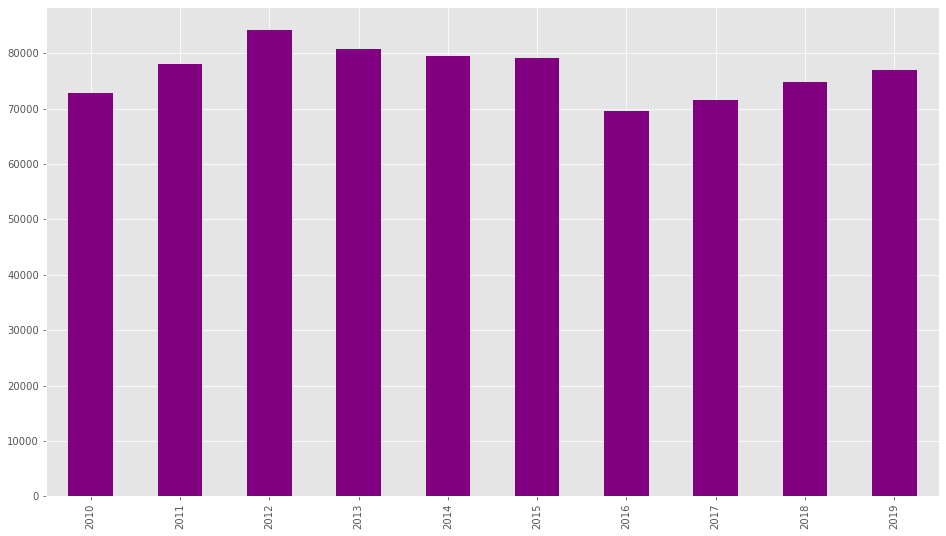

In [38]:
#GRAFICA DE BARRAS DE MATRIMONIOS POR AñO

DATAMATRIMONIOS['AÑOOCU'].value_counts().sort_index().plot(kind='bar',color='purple')

print(DATAMATRIMONIOS['AÑOOCU'].value_counts().sort_values(ascending=False))

In [39]:
# Modificacion de valores en , se cambio MESOCU ,ESCMUJ,  y MESREG a enteros.

DATAMATRIMONIOS['MESOCU'] = DATAMATRIMONIOS['MESOCU'].astype(str)
DATAMATRIMONIOS['MESOCU'] = DATAMATRIMONIOS['MESOCU'].str.replace('Enero', '1')
DATAMATRIMONIOS['MESOCU'] = DATAMATRIMONIOS['MESOCU'].str.replace('Febrero', '2')
DATAMATRIMONIOS['MESOCU'] = DATAMATRIMONIOS['MESOCU'].str.replace('Marzo', '3')
DATAMATRIMONIOS['MESOCU'] = DATAMATRIMONIOS['MESOCU'].str.replace('Abril', '4')
DATAMATRIMONIOS['MESOCU'] = DATAMATRIMONIOS['MESOCU'].str.replace('Mayo', '5')
DATAMATRIMONIOS['MESOCU'] = DATAMATRIMONIOS['MESOCU'].str.replace('Junio', '6')
DATAMATRIMONIOS['MESOCU'] = DATAMATRIMONIOS['MESOCU'].str.replace('Julio', '7')
DATAMATRIMONIOS['MESOCU'] = DATAMATRIMONIOS['MESOCU'].str.replace('Agosto', '8')
DATAMATRIMONIOS['MESOCU'] = DATAMATRIMONIOS['MESOCU'].str.replace('Septiembre', '9')
DATAMATRIMONIOS['MESOCU'] = DATAMATRIMONIOS['MESOCU'].str.replace('Octubre', '10')
DATAMATRIMONIOS['MESOCU'] = DATAMATRIMONIOS['MESOCU'].str.replace('Noviembre', '11')
DATAMATRIMONIOS['MESOCU'] = DATAMATRIMONIOS['MESOCU'].str.replace('Diciembre', '12')
DATAMATRIMONIOS['MESOCU'] = DATAMATRIMONIOS['MESOCU'].astype(int)

DATAMATRIMONIOS['MESREG'] = DATAMATRIMONIOS['MESREG'].astype(str)
DATAMATRIMONIOS['MESREG'] = DATAMATRIMONIOS['MESREG'].str.replace('Enero', '1')
DATAMATRIMONIOS['MESREG'] = DATAMATRIMONIOS['MESREG'].str.replace('Febrero', '2')
DATAMATRIMONIOS['MESREG'] = DATAMATRIMONIOS['MESREG'].str.replace('Marzo', '3')
DATAMATRIMONIOS['MESREG'] = DATAMATRIMONIOS['MESREG'].str.replace('Abril', '4')
DATAMATRIMONIOS['MESREG'] = DATAMATRIMONIOS['MESREG'].str.replace('Mayo', '5')
DATAMATRIMONIOS['MESREG'] = DATAMATRIMONIOS['MESREG'].str.replace('Junio', '6')
DATAMATRIMONIOS['MESREG'] = DATAMATRIMONIOS['MESREG'].str.replace('Julio', '7')
DATAMATRIMONIOS['MESREG'] = DATAMATRIMONIOS['MESREG'].str.replace('Agosto', '8')
DATAMATRIMONIOS['MESREG'] = DATAMATRIMONIOS['MESREG'].str.replace('Septiembre', '9')
DATAMATRIMONIOS['MESREG'] = DATAMATRIMONIOS['MESREG'].str.replace('Octubre', '10')
DATAMATRIMONIOS['MESREG'] = DATAMATRIMONIOS['MESREG'].str.replace('Noviembre', '11')
DATAMATRIMONIOS['MESREG'] = DATAMATRIMONIOS['MESREG'].str.replace('Diciembre', '12')
DATAMATRIMONIOS['MESREG'] = DATAMATRIMONIOS['MESREG'].astype(int)


DATAMATRIMONIOS['ESCMUJINT'] = DATAMATRIMONIOS['ESCMUJ'].astype(str)
DATAMATRIMONIOS['ESCMUJINT'] = DATAMATRIMONIOS['ESCMUJINT'].str.replace('Ignorado', '-1')
DATAMATRIMONIOS['ESCMUJINT'] = DATAMATRIMONIOS['ESCMUJINT'].str.replace('Ninguno', '0')
DATAMATRIMONIOS['ESCMUJINT'] = DATAMATRIMONIOS['ESCMUJINT'].str.replace('Primaria', '1')
DATAMATRIMONIOS['ESCMUJINT'] = DATAMATRIMONIOS['ESCMUJINT'].str.replace('Básico', '2')
DATAMATRIMONIOS['ESCMUJINT'] = DATAMATRIMONIOS['ESCMUJINT'].str.replace('Diversificado', '3')
DATAMATRIMONIOS['ESCMUJINT'] = DATAMATRIMONIOS['ESCMUJINT'].str.replace('DIversificado', '3')
DATAMATRIMONIOS['ESCMUJINT'] = DATAMATRIMONIOS['ESCMUJINT'].str.replace('Universitario', '4')
DATAMATRIMONIOS['ESCMUJINT'] = DATAMATRIMONIOS['ESCMUJINT'].str.replace('Postgrado', '5')
DATAMATRIMONIOS['ESCMUJINT'] = DATAMATRIMONIOS['ESCMUJINT'].str.replace('Post Grado', '5')
DATAMATRIMONIOS['ESCMUJINT'] = DATAMATRIMONIOS['ESCMUJINT'].astype(int)

DATAMATRIMONIOS = DATAMATRIMONIOS[DATAMATRIMONIOS['ESCMUJINT'] >= 0]

DATAMATRIMONIOS['ESCHOMINT'] = DATAMATRIMONIOS['ESCHOM'].astype(str)
DATAMATRIMONIOS['ESCHOMINT'] = DATAMATRIMONIOS['ESCHOMINT'].str.replace('Ignorado', '-1')
DATAMATRIMONIOS['ESCHOMINT'] = DATAMATRIMONIOS['ESCHOMINT'].str.replace('Ninguno', '0')
DATAMATRIMONIOS['ESCHOMINT'] = DATAMATRIMONIOS['ESCHOMINT'].str.replace('Primaria', '1')
DATAMATRIMONIOS['ESCHOMINT'] = DATAMATRIMONIOS['ESCHOMINT'].str.replace('Básico', '2')
DATAMATRIMONIOS['ESCHOMINT'] = DATAMATRIMONIOS['ESCHOMINT'].str.replace('Diversificado', '3')
DATAMATRIMONIOS['ESCHOMINT'] = DATAMATRIMONIOS['ESCHOMINT'].str.replace('DIversificado', '3')
DATAMATRIMONIOS['ESCHOMINT'] = DATAMATRIMONIOS['ESCHOMINT'].str.replace('Universitario', '4')
DATAMATRIMONIOS['ESCHOMINT'] = DATAMATRIMONIOS['ESCHOMINT'].str.replace('Postgrado', '5')
DATAMATRIMONIOS['ESCHOMINT'] = DATAMATRIMONIOS['ESCHOMINT'].str.replace('Post Grado', '5')
DATAMATRIMONIOS['ESCHOMINT'] = DATAMATRIMONIOS['ESCHOMINT'].astype(int)


DATAMATRIMONIOS = DATAMATRIMONIOS[DATAMATRIMONIOS['ESCHOMINT'] >= 0]


Podemos observar que no hay una diferencia significativa entre los matrimonios en cada año.

Guatemala         140501
Huehuetenango      51590
Alta Verapaz       48188
San Marcos         45542
Quiche             42311
Quetzaltenango     40258
Chimaltenango      34701
Escuintla          31040
Suchitepequez      30432
Jutiapa            22829
Peten              22216
Totonicapan        22162
Solola             18712
Sacatepequez       17360
Retalhuleu         17125
Santa Rosa         16297
Chiquimula         15838
Jalapa             14165
Izabal             14069
Baja Verapaz       13305
Zacapa             10726
El Progreso         7549
Name: DEPREG, dtype: int64


<AxesSubplot:ylabel='DEPREG'>

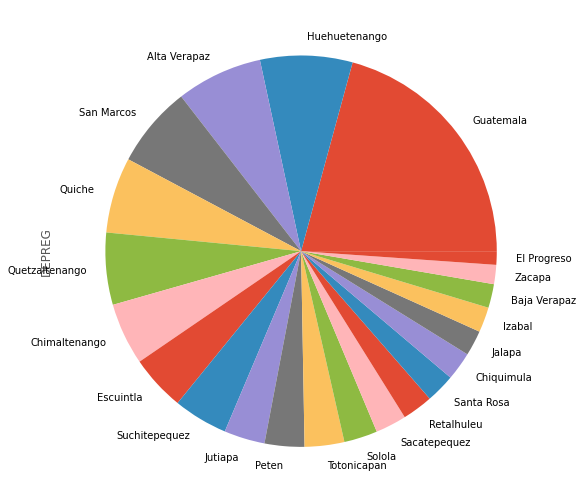

In [40]:
# MATRIMONIOS POR DEPARTAMENTO DE GUATEMALA

print(DATAMATRIMONIOS['DEPREG'].value_counts().sort_values(ascending=False))
DATAMATRIMONIOS['DEPREG'].value_counts().plot(kind='pie')

Es muy evidente la diferencia entre los matrimonions en los departamentos, especialmente en Guatemala, esto se debe a que es el departamento mas poblado , siendo la capital del pais.

Guatemala                74496
Villa Nueva              12074
Quetzaltenango            9592
Cobán                     9145
San Pedro Carchá          8655
                         ...  
Santa Catarina Palopó      118
Petatán                     89
Sipacate                    86
San Marcos la Laguna        76
San José La Maquina         73
Name: MUPREG, Length: 335, dtype: int64


<AxesSubplot:>

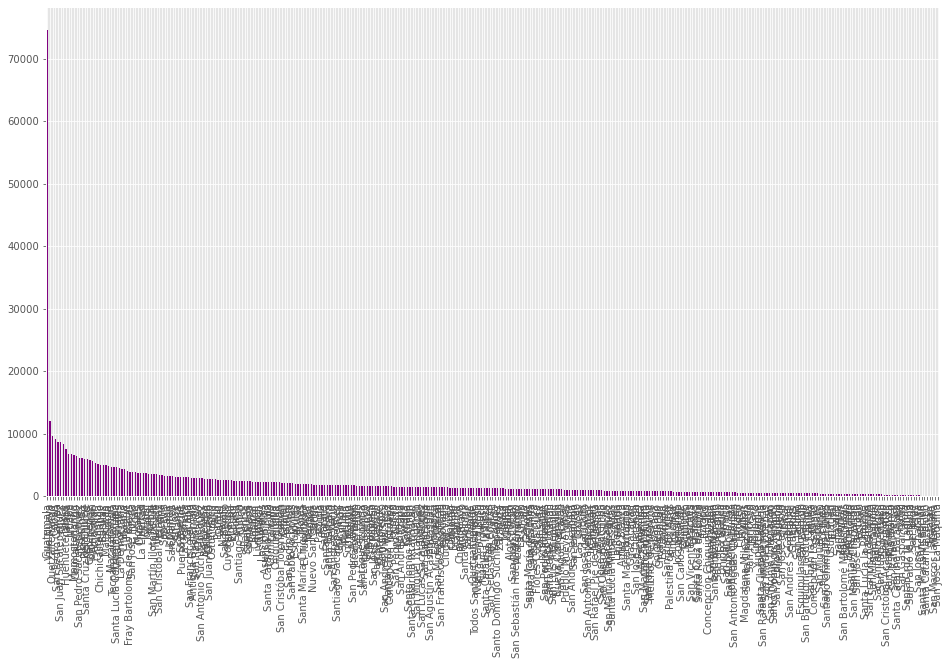

In [41]:
# MATRIMONIOS POR REGION DE GUATEMALA
print(DATAMATRIMONIOS['MUPREG'].value_counts().sort_values(ascending=False))
DATAMATRIMONIOS['MUPREG'].value_counts().plot(kind='bar',color='purple')

Debido a que las regiones son demasiadas en cantidad no se puede realizar un analisis optimo. Sin embargo podemos ver claramente que la region dominante en matrimonios es la capital nuevamente, la region mas pooblada.

<AxesSubplot:>

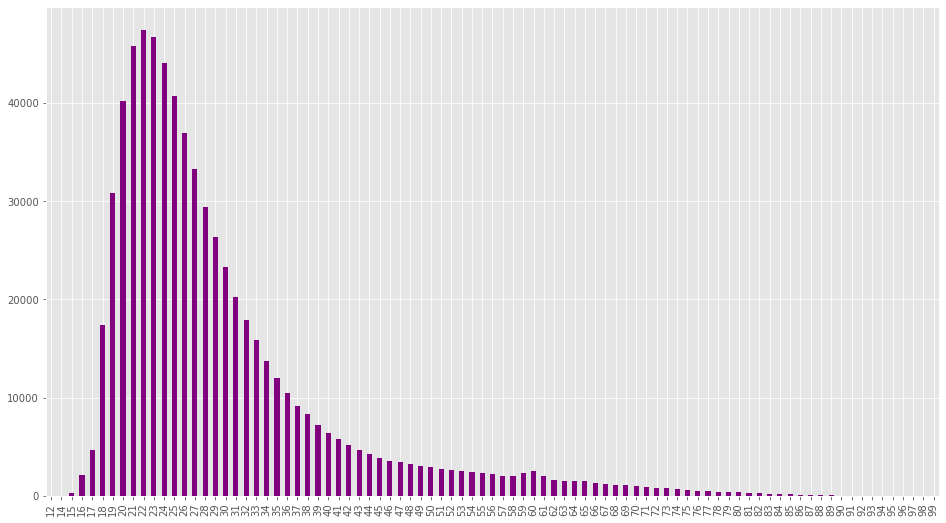

In [42]:
# MATRIMONIOS POR EDAD DEL HOMBRE DE GUATEMALA
DATAMATRIMONIOS['EDADHOM'].value_counts().sort_index().plot(kind='bar',color='purple')


Podemos observar que la edad mas comun para contraer Matrimonio es a los 20-25 años , sin embargo, existen matrimonios de menores de edad, principamente a la edad de 17 años, siendo el hombre todavia NO mayor de edad, tambien ematrimonios a los 15-16 años.

<AxesSubplot:>

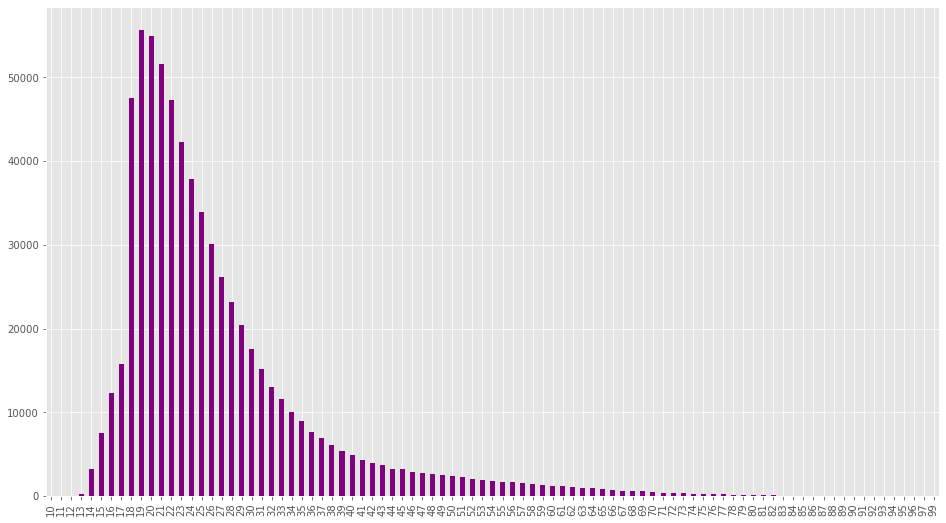

In [43]:
# MATRIMONIOS POR EDAD DE MUJER DE GUATEMALA
DATAMATRIMONIOS['EDADMUJ'].value_counts().sort_index().plot(kind='bar',color='purple')


Podemos observar que las mujeres tienen un alto indice al momento de contraer matrimonio siendo menores, mucho mas que los hombres, la edad donde mas contraen es a los 19 , sin embargo, a la edad de 17 , 16 , 15 y 14 contraen matrimonios significativamente.

12    69271
1     64124
5     60189
3     59918
11    58504
4     55160
2     54802
8     54484
10    52525
6     50110
7     49298
9     48531
Name: MESREG, dtype: int64


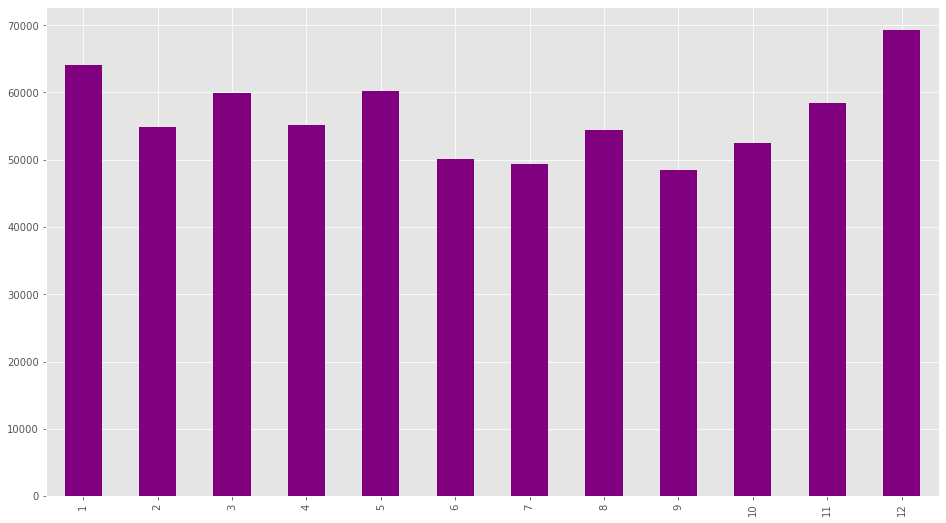

In [44]:
DATAMATRIMONIOS['MESREG'].value_counts().sort_index().plot(kind='bar',color='purple')

print(DATAMATRIMONIOS['MESREG'].value_counts().sort_values(ascending=False))

Podemos ver que el mes donde mas se contraen matirmonios es Diciembre , siguiendole Enero.

<AxesSubplot:>

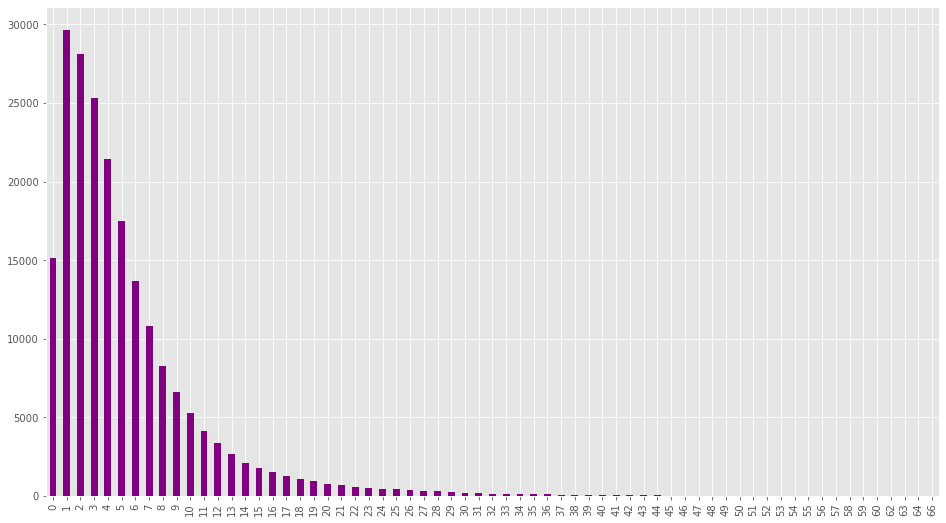

In [45]:
#CREAMOS RESTAEDADES PARA OBTENER LA DIFERENCIA DE EDADES ENTRE LAS PERSONAS CONTRAYENDO MATRIMONIO
DATAMATRIMONIOS['RESTAEDADES'] = DATAMATRIMONIOS['EDADHOM'].sub(DATAMATRIMONIOS['EDADMUJ']).abs()

DATAMATRIMONIOS[(DATAMATRIMONIOS['ESCMUJINT'] == 0) | (DATAMATRIMONIOS['ESCHOMINT'] == 0)]['RESTAEDADES'].value_counts().sort_index().plot(kind='bar',color='purple')

En este grafico podemos observar la diferencia de edades entre los casados, la mayoria de matrimonios tienen de diferencia entre 1-5 años.

Asimetria: 2.736381059440005
Curtosis: 12.256656644698323


<AxesSubplot:>

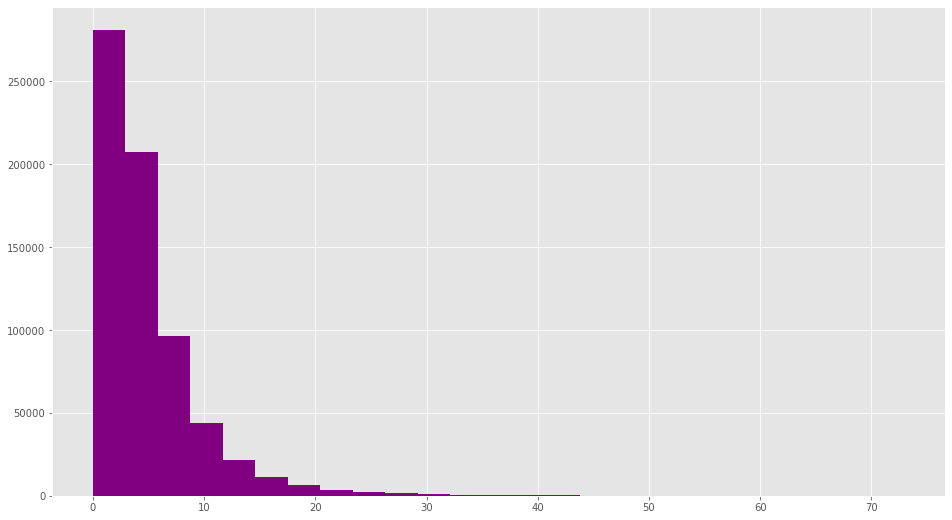

In [46]:
print('Asimetria:', DATAMATRIMONIOS['RESTAEDADES'].skew())
print('Curtosis:', DATAMATRIMONIOS['RESTAEDADES'].kurt())
DATAMATRIMONIOS['RESTAEDADES'].hist(bins=25,color='purple')

Aqui podemos observar en el histograma de diferencias de edades entre los casados que la curtosis es de 12.25, coeficiente positivo mayor a 3 , notamos que los valores estan bastante concentrados. La asimetria de igual forma tiene un coeficiente positivo, podemos ver que la media de los datos esta hacia la derecha por eso mayor a 0 el valor de asimetria.

<AxesSubplot:>

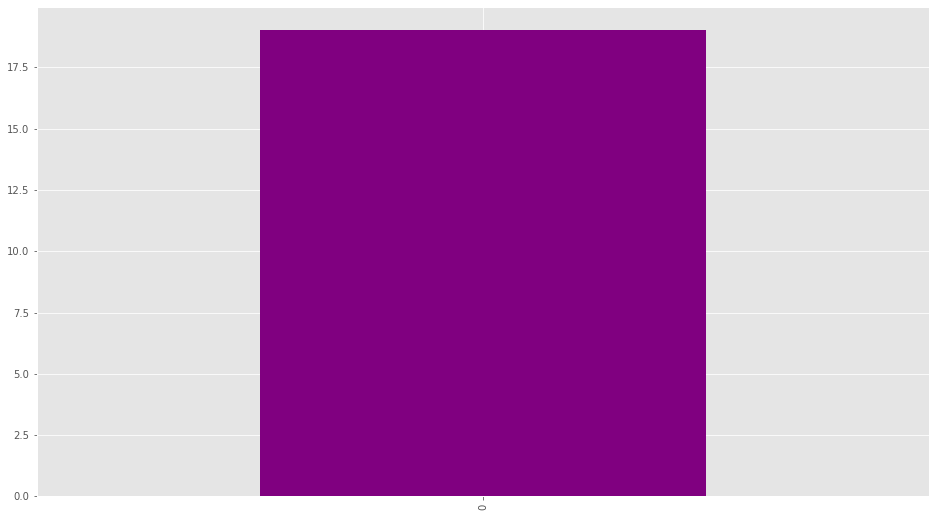

In [47]:
DATAMATRIMONIOS['EDADMUJ'].mode('EDADMUJ').plot(kind='bar',color='purple')

In [48]:
#INICIA EL CLUSTERING

Lets = DATAMATRIMONIOS[[ 'MESOCU', 'EDADHOM', 'EDADMUJ', 'ESCHOMINT', 'ESCMUJINT']] #Declaramos nuestra lista de columnas a trabajar

CantDatos = np.array(Lets.sample(frac=0.1, random_state=123).reset_index(drop=True)) #Declaramos CantDatos
CantDatos_scaled = sklearn.preprocessing.scale(CantDatos) #Realizamos las modificaicones a CantDatos
pyclustertend.hopkins(CantDatos, len(CantDatos)) #Aplicamos HOPKINS para ver  la tendencia para los clusters

0.07695684004313788

El valor de hopkins nos da un 0.0768 alejado de 0.5 validando nuestro clustering.

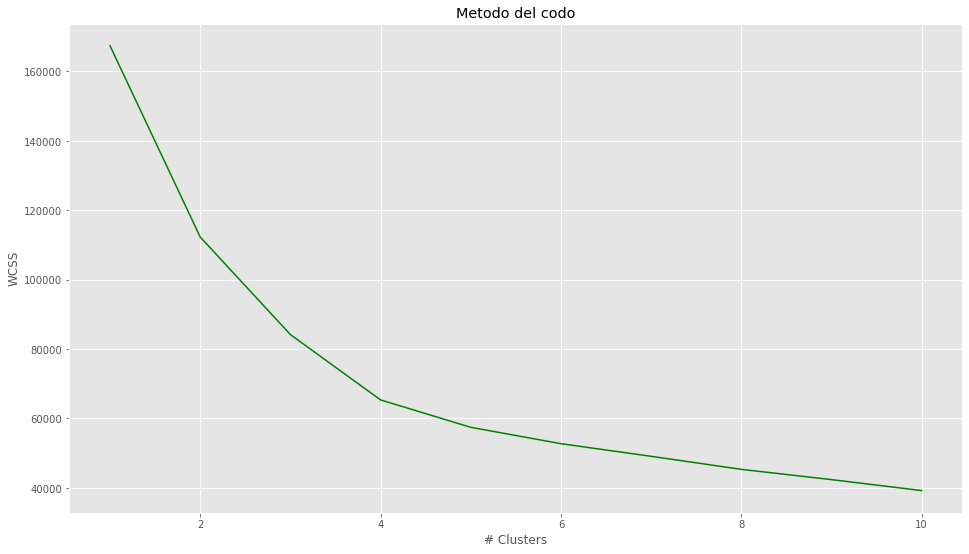

In [49]:
Lets_norm = (Lets - Lets.min()) / (Lets.max() - Lets.min())  #Realizamos una normalizacaion entre las variables a trabajar.
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter=300)         #Utilizamos el metodo del codo y el algoritmo KMEANS
    kmeans.fit(Lets_norm)                                 #para determinar la mejor cantidad de clusters dependiendo los datos normalizados.
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss,color='green')
plt.title('Metodo del codo')
plt.xlabel('# Clusters')
plt.ylabel('WCSS')
plt.show()


Utilizamos KMEANS , y podemos observar como el declieve en la pendiente se da en el valor de 2 , siendo este la mejor cantidad de clusters a utilizar gracias al metodo de Codo.

Con:  2 Clusters  La cantidad promedio de la silueta es : 0.6470934954694808
Con:  3 Clusters  La cantidad promedio de la silueta es : 0.45092961450524927
Con:  4 Clusters  La cantidad promedio de la silueta es : 0.3554927285661972
Con:  5 Clusters  La cantidad promedio de la silueta es : 0.2930803134322536
Con:  6 Clusters  La cantidad promedio de la silueta es : 0.2600252843572982


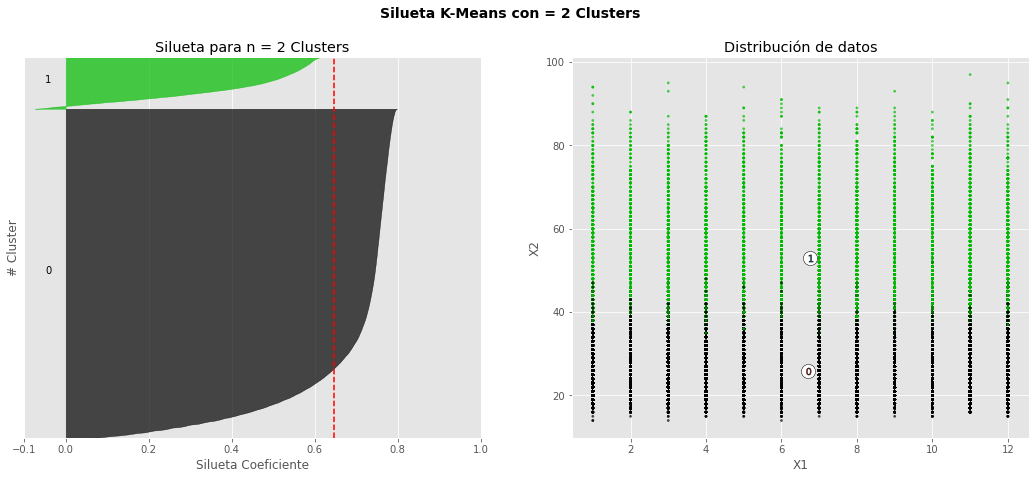

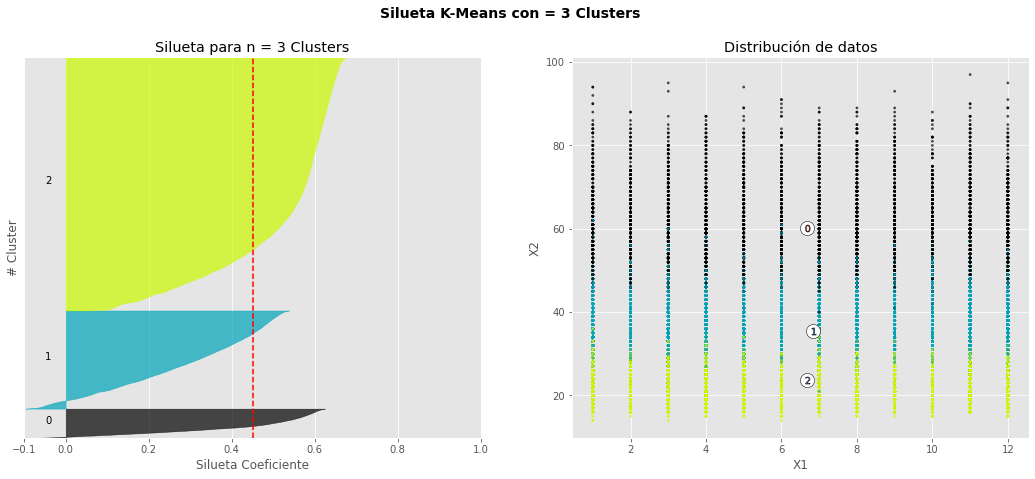

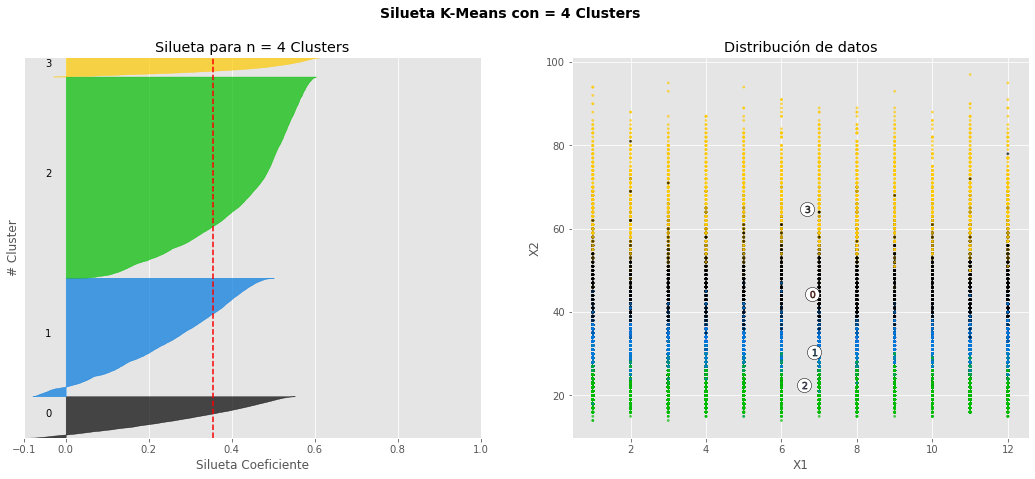

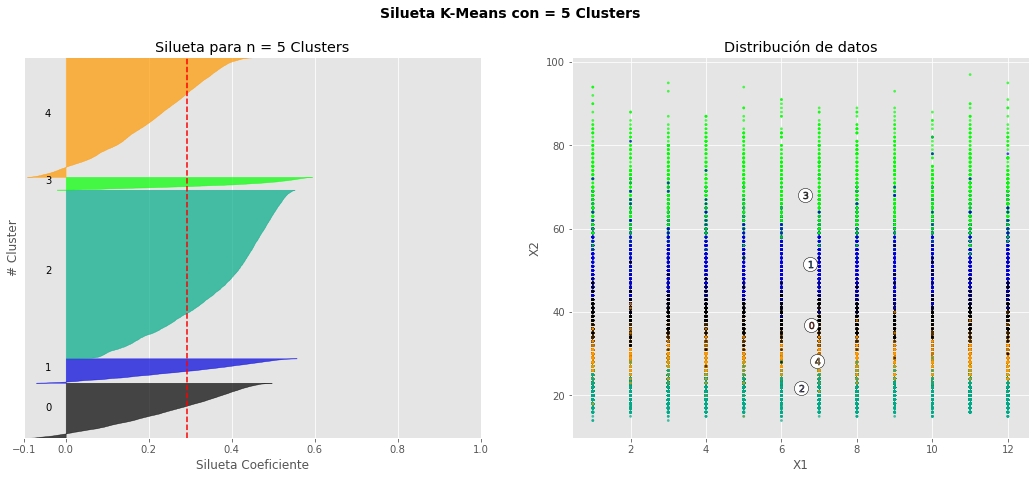

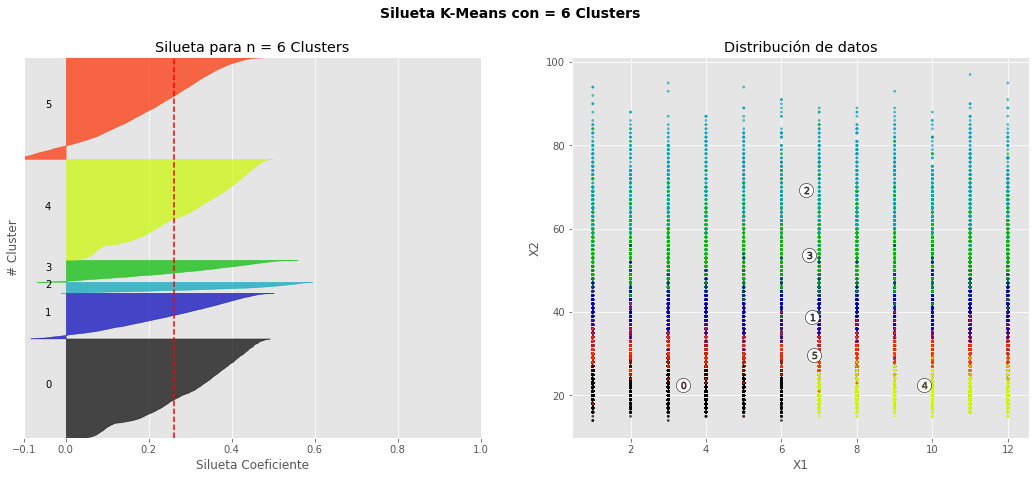

In [56]:
# METODO DE SILUETA REALIZADO USANDO DE BASE EL EJERCICO DE SILUETA REALIZADO EN LA CLASE

range_n_clusters = [2, 3, 4, 5, 6]

# Inicia ciclo respecto a los valores que puede tomar nuestro conjunto de clusteres
for n_clusters in range_n_clusters:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(CantDatos) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(CantDatos)

    silhouette_avg = silhouette_score(CantDatos, cluster_labels)
    print(
        "Con: ",
        n_clusters,
        "Clusters  La cantidad promedio de la silueta es :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(CantDatos, cluster_labels)

    y_lower = 10

    # Inicia el ciclo sobre los grupos de clusters
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)

        # Imprimimos la silueta
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Dibujamos los nombres del determinado grupo
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        
        y_lower = y_upper + 10

    ax1.set_title("Silueta para n = {} Clusters".format(n_clusters))
    ax1.set_xlabel("Silueta Coeficiente")
    ax1.set_ylabel("# Cluster")


    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]) 

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        CantDatos[:, 0], CantDatos[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Dibuja el centroide de cada grupo
    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )
    for i, c in enumerate(centers):

        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")



    ax2.set_title("Distribución de datos")
    ax2.set_xlabel("X1")
    ax2.set_ylabel("X2")

    plt.suptitle(
        "Silueta K-Means con = %d Clusters"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Podemos observar los coeficientes de silueta de nuestros distintos escenarios con distinta cantidad de clusters, notamos que en 2 clusteres tenemos un coeficiente de 0.64, siendo este un buen resultado del promedio. Dado este resultado mas el metodo de codo podemos reafirmar que utilizar 2 clusteres es lo mas optimo .